# Group By Exercise

**This exercise uses the `laliga.csv` dataset**

## Part 1

In [1]:
import pandas as pd
laliga = pd.read_csv('../datasets/laliga.csv')

In [2]:
#Find the 5 teams that had the most "Red Cards"
laliga.groupby("Team").aggregate("sum")['Red Cards'].sort_values(ascending=False).head()

Team
Rayo Vallecano    8
Levante UD        7
Real Madrid       6
Getafe CF         6
RC Celta          6
Name: Red Cards, dtype: int64

In [3]:
# Find the average number of "Long passes" made by each Position (Goalkeeper, Forward, etc.)
laliga.groupby('Position')['Long passes'].mean()

Position
Defender      102.610811
Forward        23.787234
Goalkeeper    242.157895
Midfielder     60.445455
Name: Long passes, dtype: float64

In [4]:
#Find the 10 Shirt numbers that scored the most goals
laliga.groupby('Shirt number')['Goals scored'].sum().nlargest(10)

Shirt number
9.0     169
10.0    117
7.0     101
19.0     69
11.0     56
22.0     47
12.0     45
17.0     38
23.0     27
8.0      23
Name: Goals scored, dtype: int64

## Part 2

**Use `agg` to create a dataframe that contains:**
* A `total` column containing the total "Shots" taken by each team
* A `on_target` column containing the total "Shots on target" taken by each team
* It should look like the following dataframe (but for all teams in the dataset):

| Team   | total | on_target |
| ----------- | ----------- | ----------- |
| **Real Betis** | 300      |158
| **Levante UD** | 314      |157

In [5]:
shots_acc = laliga.groupby('Team')[['Shots', 'Shots on target']].agg(
    total = ('Shots', 'sum'),
    on_target = ('Shots on target', 'sum')
)

In [6]:
shots_acc['accuracy'] = shots_acc['on_target'] / shots_acc['total']
shots_acc

,total,on_target,accuracy
Team,,,
Athletic Club,332,151,0.454819
Atlético de Madrid,339,159,0.469027
CD Leganés,334,132,0.395210
D. Alavés,299,109,0.364548
FC Barcelona,445,249,0.559551
Getafe CF,283,121,0.427562
Girona FC,324,147,0.453704
Levante UD,314,157,0.500000
R. Valladolid CF,319,131,0.410658


Use the dataframe from above to create the following figure:

* Notice the layout (2 rows by 1 column)
* The top chart shows the top 5 most accurate teams (highest on-target shot pecentage)
* The bottom chart shows the 5 least accurate teams (lowest on-target shot pecentage)
* Both plots share the same x-axis
* Notice how the data is sorted within each plot!


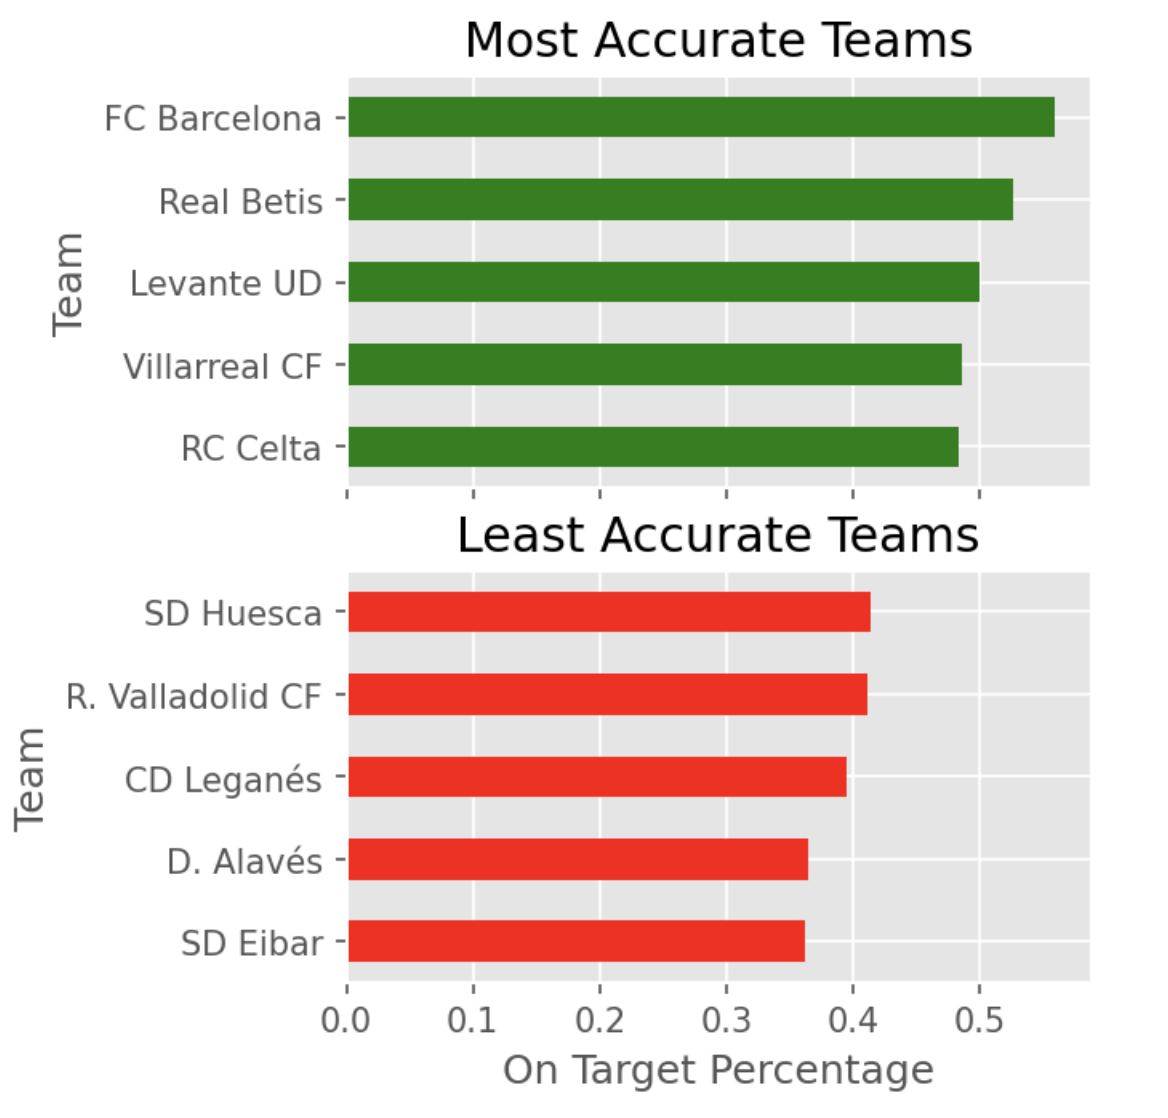

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

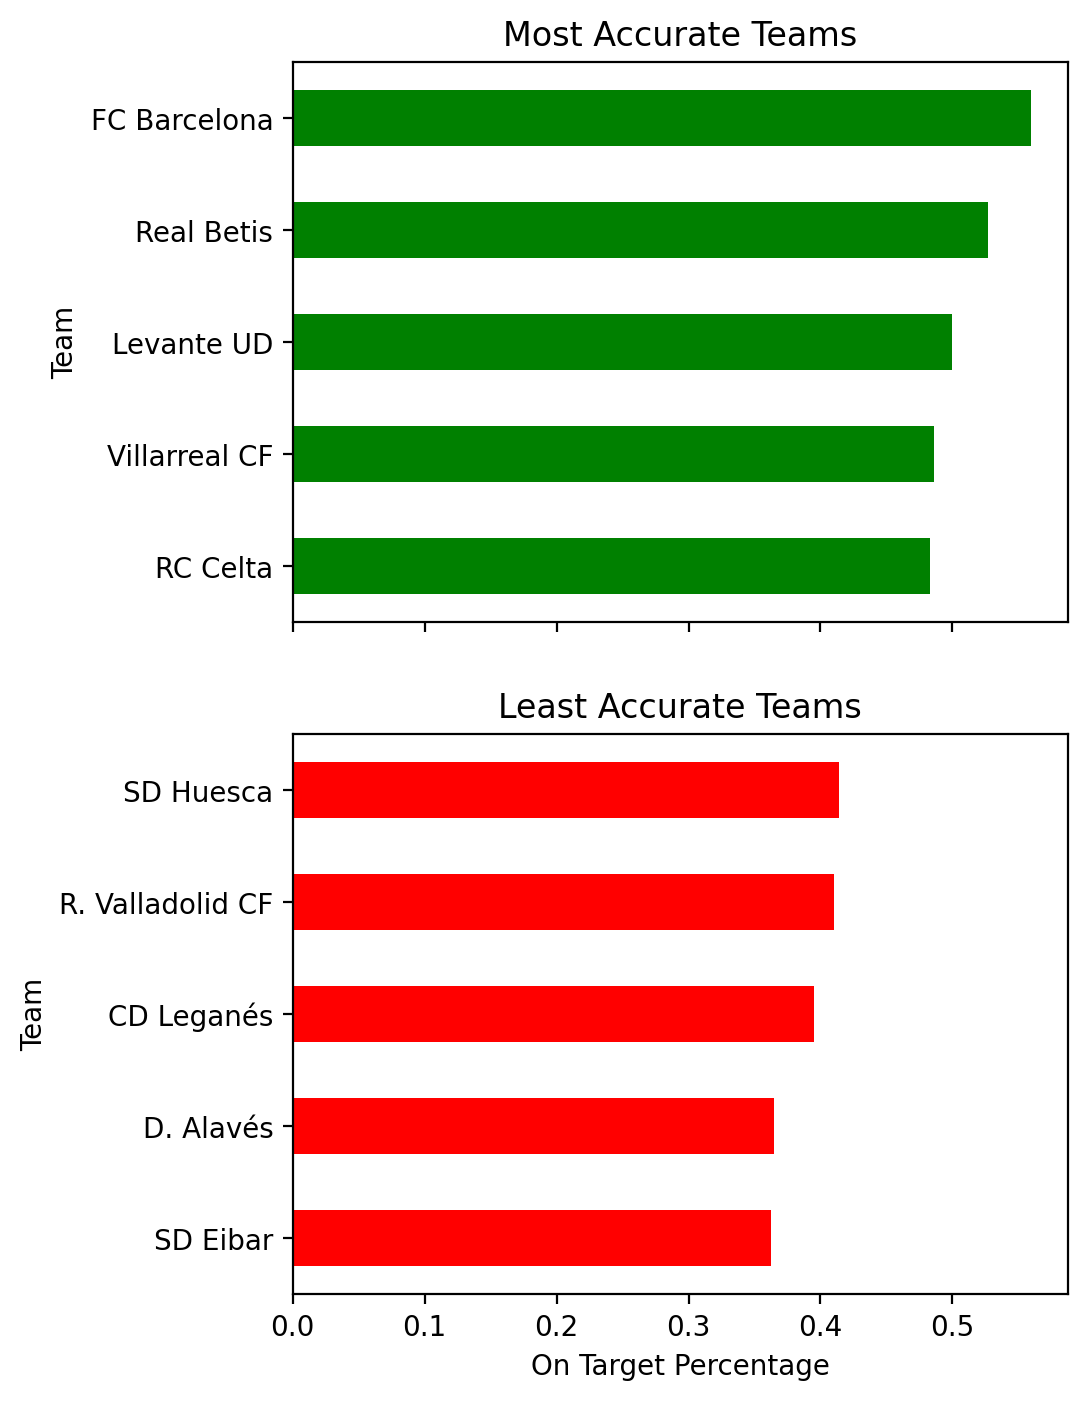

In [8]:
fig, axes = plt.subplots(2,1, figsize=(5,8), dpi=200, sharex=True)

most_acc = shots_acc['accuracy'].nlargest(5).sort_values()
least_acc = shots_acc['accuracy'].nsmallest(5).sort_values()

most_acc.plot(kind='barh', ax=axes[0], color='green', title='Most Accurate Teams')
least_acc.plot(kind='barh', ax=axes[1], color='red', title='Least Accurate Teams')

plt.xlabel("On Target Percentage")
plt.show()